# Phase 4 Project Notebook
- Author: Jonathan Holt
- Data Science Flex

## Business Problem
- What are the top 5 best zip codes for us to invest in?

## Questions to Answer

1. What is the average (mean) home price for zip codes?
    a. also by: State, Metro Region, etc.
2. Which zip codes performed above expectations?
3. Do the top performing zip codes have any identifiers?


## What Models & Metrics I plan on using

## Helper Functions
- Functions provided by Flatiron

In [1]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [2]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [3]:
#function for displaying money in millions.
def display_millions(x, pos):
    return '${:1.1f}M'.format(x*1e-6)

# PreProcessing

## Loading Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows', 1500) #change the amount of rows displayed

pd.options.display.float_format = '{:,.2f}'.format 

In [5]:
df = pd.read_csv("zillow_data.csv")

In [6]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,"334,200.00","335,400.00","336,500.00",...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,"235,700.00","236,900.00","236,700.00",...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,"210,400.00","212,200.00","212,200.00",...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,"498,100.00","500,900.00","503,100.00",...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,"77,300.00","77,300.00","77,300.00",...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


##  Fixing RegionName
A google search shows that RegionName is the ZipCode for each Region. However, upon sorting, I discovered that any ZipCode beginning with a 0 was ignoring it and displaying as a 4 digit number. I will use the .str().zfill() method to ensure that all RegionNames are displaying the as 5 digits.

In [7]:
df['RegionName'] = df['RegionName'].astype(str).str.zfill(5)

In [8]:
# Change to ZipCode?

## Checking for Null Values

In [9]:
df.isnull().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
CountyName       0
SizeRank         0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
1997-05       1039
1997-06       1039
1997-07       1038
1997-08       1038
1997-09       1038
1997-10       1038
1997-11       1038
1997-12       1038
1998-01       1036
1998-02       1036
1998-03       1036
1998-04       1036
1998-05       1036
1998-06       1036
1998-07       1036
1998-08       1036
1998-09       1036
1998-10       1036
1998-11       1036
1998-12       1036
1999-01       1036
1999-02       1036
1999-03       1036
1999-04       1036
1999-05       1036
1999-06       1036
1999-07       1036
1999-08       1036
1999-09       1036
1999-10       1036
1999-11       1036
1999-12       1036
2000-01     

### Analysis
There are many Null Values. 
- For categorical data, 7% of Metro are null (1043 of 14,723).
- Dates from 1996 - mid 2003, also have 7% null values.
- Then it starts to get better. 6% null and decreasing.

What is my decision on null values?
- keep?
- delete?
- change (mean)?

### Metro

In [10]:
df['Metro'].value_counts()

New York                              779
Los Angeles-Long Beach-Anaheim        347
Chicago                               325
Philadelphia                          281
Washington                            249
Boston                                246
Dallas-Fort Worth                     217
Minneapolis-St Paul                   201
Houston                               187
Pittsburgh                            177
Miami-Fort Lauderdale                 162
Portland                              161
Detroit                               153
Atlanta                               152
Seattle                               141
St. Louis                             140
San Francisco                         134
Kansas City                           127
Phoenix                               126
Baltimore                             122
Tampa                                 118
Riverside                             116
Cincinnati                            109
Denver                            

In [11]:
df['Metro'].fillna('no_metro', inplace=True)

In [12]:
df['Metro'].value_counts()

no_metro                              1043
New York                               779
Los Angeles-Long Beach-Anaheim         347
Chicago                                325
Philadelphia                           281
Washington                             249
Boston                                 246
Dallas-Fort Worth                      217
Minneapolis-St Paul                    201
Houston                                187
Pittsburgh                             177
Miami-Fort Lauderdale                  162
Portland                               161
Detroit                                153
Atlanta                                152
Seattle                                141
St. Louis                              140
San Francisco                          134
Kansas City                            127
Phoenix                                126
Baltimore                              122
Tampa                                  118
Riverside                              116
Cincinnati 

## Dealing with Nulls

DEAL WITH NULLS HERE!

In [13]:
df.isna().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro            0
CountyName       0
SizeRank         0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
1997-05       1039
1997-06       1039
1997-07       1038
1997-08       1038
1997-09       1038
1997-10       1038
1997-11       1038
1997-12       1038
1998-01       1036
1998-02       1036
1998-03       1036
1998-04       1036
1998-05       1036
1998-06       1036
1998-07       1036
1998-08       1036
1998-09       1036
1998-10       1036
1998-11       1036
1998-12       1036
1999-01       1036
1999-02       1036
1999-03       1036
1999-04       1036
1999-05       1036
1999-06       1036
1999-07       1036
1999-08       1036
1999-09       1036
1999-10       1036
1999-11       1036
1999-12       1036
2000-01     

In [14]:
#df.fillna(df.mean(), inplace=True)

In [15]:
# I didn't like what this method did
#df.fillna(method='bfill', inplace=True)

In [16]:
df.isna().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro            0
CountyName       0
SizeRank         0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
1997-05       1039
1997-06       1039
1997-07       1038
1997-08       1038
1997-09       1038
1997-10       1038
1997-11       1038
1997-12       1038
1998-01       1036
1998-02       1036
1998-03       1036
1998-04       1036
1998-05       1036
1998-06       1036
1998-07       1036
1998-08       1036
1998-09       1036
1998-10       1036
1998-11       1036
1998-12       1036
1999-01       1036
1999-02       1036
1999-03       1036
1999-04       1036
1999-05       1036
1999-06       1036
1999-07       1036
1999-08       1036
1999-09       1036
1999-10       1036
1999-11       1036
1999-12       1036
2000-01     

### Analysis:
- I think it's okay to leave the NaN values for now as these records appear to be in rural areas where there wouldn't be close enough to a city to be considered part of the Metro area. 
- I only plan on using Metro area to look at cities anyway, so there shouldn't be a penalty or unneccessary exlusion on any of the records lacking Metro values

## Creating Avg_home_df
- Create Dataset that is just the mean values to do analysis of trends, etc for baseline.
- then I can look for zip codes that have the best performance above and beyong baseline.

In [17]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,"334,200.00","335,400.00","336,500.00",...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,"235,700.00","236,900.00","236,700.00",...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,"210,400.00","212,200.00","212,200.00",...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,"498,100.00","500,900.00","503,100.00",...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,"77,300.00","77,300.00","77,300.00",...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [18]:
df_value = df.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'])

In [19]:
avg_home_df = pd.DataFrame(df_value.mean())

In [20]:
avg_home_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 1996-04 to 2018-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       265 non-null    float64
dtypes: float64(1)
memory usage: 4.1+ KB


In [21]:
avg_home_df.head()

,0
1996-04,"118,299.12"
1996-05,"118,419.04"
1996-06,"118,537.42"
1996-07,"118,653.07"
1996-08,"118,780.25"


In [22]:
avg_home_df = avg_home_df.reset_index()
avg_home_df['time'] = pd.to_datetime(avg_home_df['index'])
avg_home_df.head()

,index,0,time
0,1996-04,"118,299.12",1996-04-01
1,1996-05,"118,419.04",1996-05-01
2,1996-06,"118,537.42",1996-06-01
3,1996-07,"118,653.07",1996-07-01
4,1996-08,"118,780.25",1996-08-01


In [23]:
avg_home_df.set_index('time', inplace=True)

In [24]:
avg_home_df.head()

,index,0
time,,
1996-04-01,1996-04,"118,299.12"
1996-05-01,1996-05,"118,419.04"
1996-06-01,1996-06,"118,537.42"
1996-07-01,1996-07,"118,653.07"
1996-08-01,1996-08,"118,780.25"


In [25]:
avg_home_df.rename(columns={0: 'home_value'}, inplace=True)

In [26]:
avg_home_df.drop(columns=('index'), inplace=True)

In [27]:
avg_home_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   home_value  265 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [28]:
avg_home_df

,home_value
time,
1996-04-01,"118,299.12"
1996-05-01,"118,419.04"
1996-06-01,"118,537.42"
1996-07-01,"118,653.07"
1996-08-01,"118,780.25"
1996-09-01,"118,927.53"
1996-10-01,"119,120.52"
1996-11-01,"119,345.35"
1996-12-01,"119,685.08"


In [29]:
#avg_home_df.resample("Y").mean()

In [30]:
#avg_home_df.rename(columns={'0': 'value'}, inplace=True)

In [31]:
avg_home_df

,home_value
time,
1996-04-01,"118,299.12"
1996-05-01,"118,419.04"
1996-06-01,"118,537.42"
1996-07-01,"118,653.07"
1996-08-01,"118,780.25"
1996-09-01,"118,927.53"
1996-10-01,"119,120.52"
1996-11-01,"119,345.35"
1996-12-01,"119,685.08"


## Analysis of Avg_Home_DF

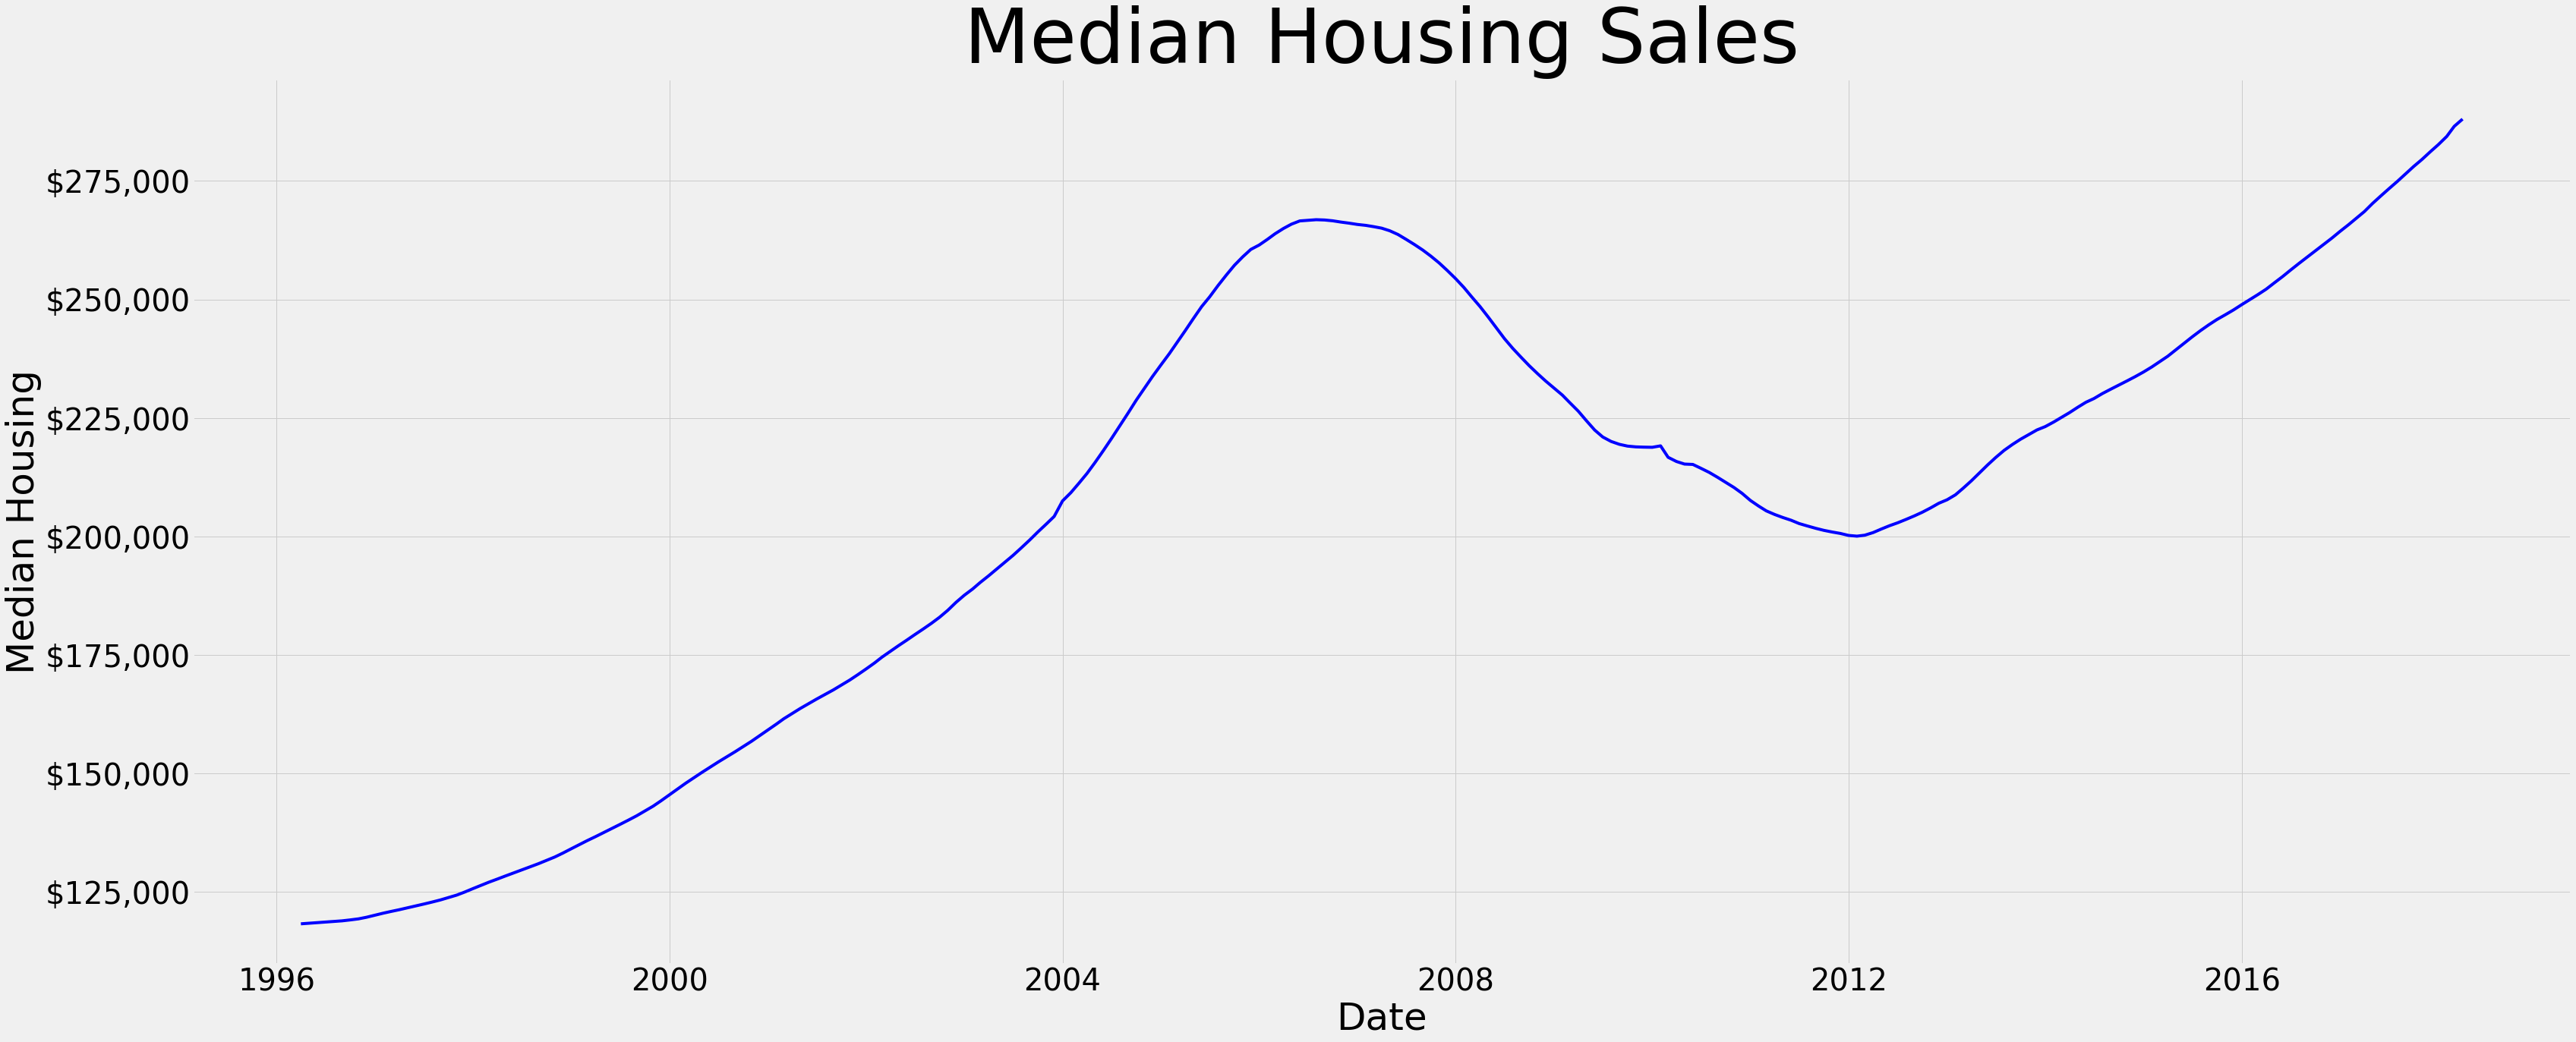

In [32]:
fig, ax = plt.subplots(figsize=(50, 20))
p = sns.lineplot(data=avg_home_df, x='time', y='home_value', color='blue');

p.set_xlabel("Date", fontsize = 50)
p.set_ylabel("Median Housing", fontsize = 50)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

p.set_title("Median Housing Sales", fontsize = 100)
plt.figsize=(50,25)

plt.show();

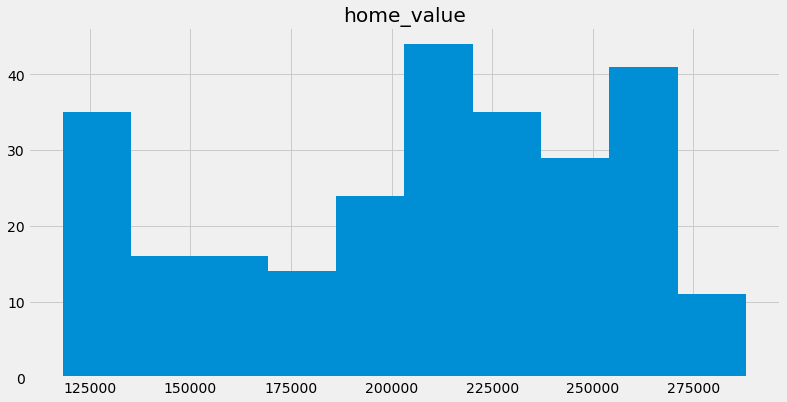

In [33]:
avg_home_df.hist(figsize = (12,6))
plt.show()

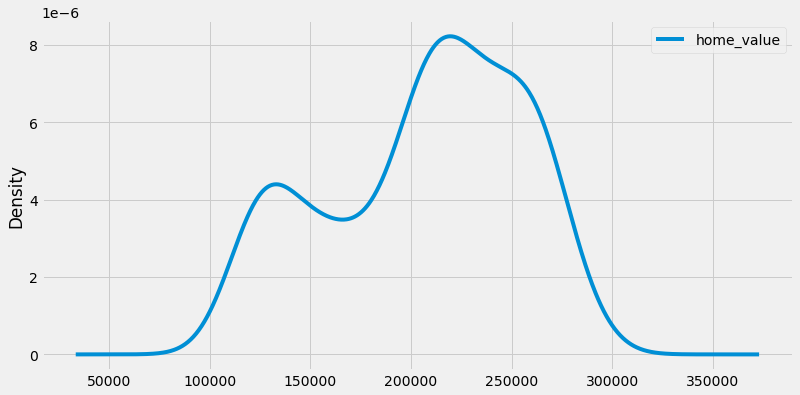

In [34]:
avg_home_df.plot(kind='kde', figsize = (12,6))
plt.show()

In [35]:
# Determine rolling statistics
roll_mean = avg_home_df.rolling(window=12, center=False).mean()
roll_std = avg_home_df.rolling(window=12, center=False).std()

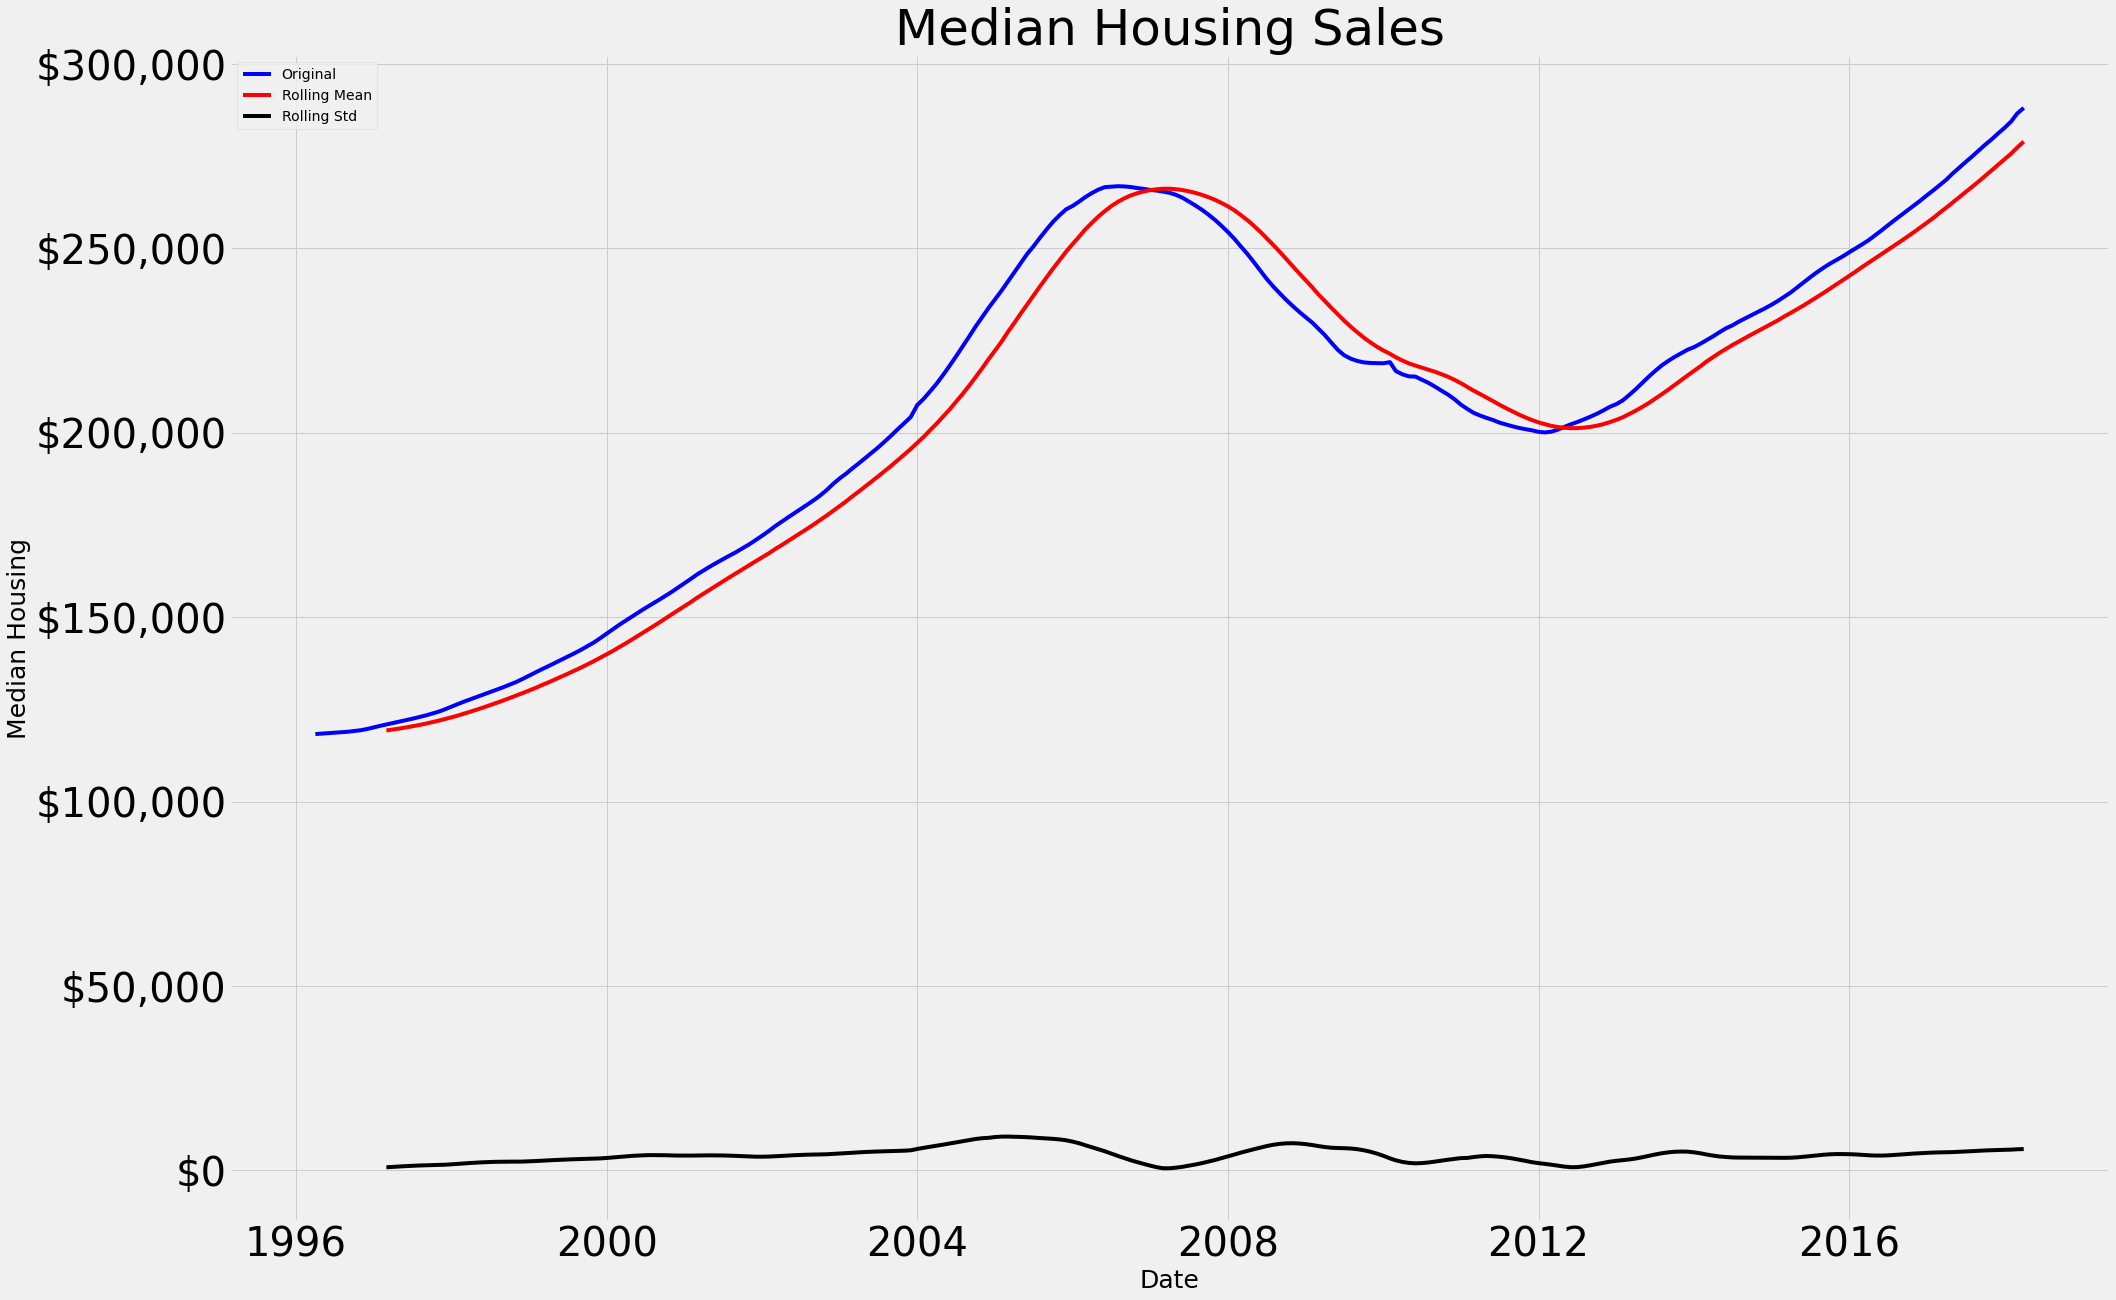

In [36]:
fig, ax = plt.subplots(figsize=(30, 20))
p = sns.lineplot(data=avg_home_df, x='time', y='home_value', color='blue', label='Original');

plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')

p.set_xlabel("Date", fontsize = 25)
p.set_ylabel("Median Housing", fontsize = 25)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

p.set_title("Median Housing Sales", fontsize = 50)
plt.figsize=(50,25)
plt.legend(loc='best')

plt.show();

## Dickey Fuller Test

In [37]:
# Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test: \n')
#dftest = adfuller(data['#Passengers'])
dftest = adfuller(avg_home_df)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test: 

Test Statistic                 -1.89
p-value                         0.34
#Lags Used                      2.00
Number of Observations Used   262.00
Critical Value (1%)            -3.46
Critical Value (5%)            -2.87
Critical Value (10%)           -2.57
dtype: float64


## DE-TREND THE DATA!
LOOK AT LESSONS TO SEE WHAT TO DO NEXT WITHOUT WASTING TIME!!!!

## Feature Engineering

- add: Region Mean, Region Growth, etc
- THE POINT IS TO IDENTIFY WHICH ZIPS ARE THE BEST PERFORMING SO I CAN NARROW DOWN THE DATA TO CAPTURE!!!!

In [38]:
# total_profit = table9.apply(lambda x: x['worldwide_gross'] - x['production_budget'], axis=1)
# table9['total_profit'] = total_profit

## Recent Data
- only the data from 2013-2018

In [39]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,"334,200.00","335,400.00","336,500.00",...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,"235,700.00","236,900.00","236,700.00",...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,"210,400.00","212,200.00","212,200.00",...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,"498,100.00","500,900.00","503,100.00",...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,"77,300.00","77,300.00","77,300.00",...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [40]:
recent_data = df.iloc[:, -64:]
recent_data.head()

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,"802,300.00","806,100.00","810,900.00","817,400.00","826,800.00","837,900.00","848,100.00","853,800.00","856,700.00","856,600.00",...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,"205,900.00","206,900.00","208,500.00","209,800.00","211,300.00","214,000.00","217,200.00","220,600.00","223,800.00","226,500.00",...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,"256,900.00","256,800.00","256,700.00","257,100.00","258,300.00","260,700.00","263,900.00","267,000.00","269,200.00","271,000.00",...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,"1,006,300.00","1,013,700.00","1,024,800.00","1,038,300.00","1,053,900.00","1,070,600.00","1,089,900.00","1,108,100.00","1,123,700.00","1,135,100.00",...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,"113,000.00","113,300.00","113,600.00","113,500.00","113,300.00","113,000.00","113,000.00","112,900.00","112,800.00","112,500.00",...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [41]:
recent_data.apply(lambda x: round(x, 2))

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,"802,300.00","806,100.00","810,900.00","817,400.00","826,800.00","837,900.00","848,100.00","853,800.00","856,700.00","856,600.00",...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,"205,900.00","206,900.00","208,500.00","209,800.00","211,300.00","214,000.00","217,200.00","220,600.00","223,800.00","226,500.00",...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,"256,900.00","256,800.00","256,700.00","257,100.00","258,300.00","260,700.00","263,900.00","267,000.00","269,200.00","271,000.00",...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,"1,006,300.00","1,013,700.00","1,024,800.00","1,038,300.00","1,053,900.00","1,070,600.00","1,089,900.00","1,108,100.00","1,123,700.00","1,135,100.00",...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,"113,000.00","113,300.00","113,600.00","113,500.00","113,300.00","113,000.00","113,000.00","112,900.00","112,800.00","112,500.00",...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,"171,800.00","173,800.00","176,800.00","179,700.00","181,500.00","182,300.00","182,200.00","182,800.00","183,200.00","183,600.00",...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,"173,500.00","173,500.00","172,200.00","171,000.00","172,100.00","174,000.00","175,800.00","177,700.00","179,100.00","179,200.00",...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,"98,800.00","99,100.00","99,000.00","98,700.00","99,000.00","100,300.00","101,300.00","101,700.00","102,700.00","104,100.00",...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,"516,200.00","520,300.00","526,900.00","531,200.00","533,700.00","535,700.00","538,400.00","538,300.00","540,200.00","537,700.00",...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [42]:
recent_data['mean'] = recent_data.apply(lambda x: x.mean(), axis=1)

In [43]:
recent_data['delta'] = recent_data.apply(lambda x: x['2018-04'] - x['2013-01'], axis=1)

In [44]:
recent_data

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,mean,delta
0,"802,300.00","806,100.00","810,900.00","817,400.00","826,800.00","837,900.00","848,100.00","853,800.00","856,700.00","856,600.00",...,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,"929,381.25","228,300.00"
1,"205,900.00","206,900.00","208,500.00","209,800.00","211,300.00","214,000.00","217,200.00","220,600.00","223,800.00","226,500.00",...,312500,314100,315000,316600,318100,319600,321100,321800,"267,568.75","115,900.00"
2,"256,900.00","256,800.00","256,700.00","257,100.00","258,300.00","260,700.00","263,900.00","267,000.00","269,200.00","271,000.00",...,320200,320400,320800,321200,321200,323000,326900,329900,"304,398.44","73,000.00"
3,"1,006,300.00","1,013,700.00","1,024,800.00","1,038,300.00","1,053,900.00","1,070,600.00","1,089,900.00","1,108,100.00","1,123,700.00","1,135,100.00",...,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,"1,201,653.12","300,700.00"
4,"113,000.00","113,300.00","113,600.00","113,500.00","113,300.00","113,000.00","113,000.00","112,900.00","112,800.00","112,500.00",...,120000,120300,120300,120300,120300,120500,121000,121500,"115,440.62","8,500.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,"171,800.00","173,800.00","176,800.00","179,700.00","181,500.00","182,300.00","182,200.00","182,800.00","183,200.00","183,600.00",...,218600,218500,218100,216400,213100,209800,209200,209300,"193,946.88","37,500.00"
14719,"173,500.00","173,500.00","172,200.00","171,000.00","172,100.00","174,000.00","175,800.00","177,700.00","179,100.00","179,200.00",...,212200,215200,214300,213100,213700,218300,222700,225800,"188,935.94","52,300.00"
14720,"98,800.00","99,100.00","99,000.00","98,700.00","99,000.00","100,300.00","101,300.00","101,700.00","102,700.00","104,100.00",...,124600,126700,128800,130600,131700,132500,133000,133400,"111,531.25","34,600.00"
14721,"516,200.00","520,300.00","526,900.00","531,200.00","533,700.00","535,700.00","538,400.00","538,300.00","540,200.00","537,700.00",...,682400,695600,695500,694700,706400,705300,681500,664400,"570,803.12","148,200.00"


## attempting merge

In [45]:
#recent_stats = recent_data.iloc[:, -3:]

In [46]:
new_df = df.iloc[:, :7]
new_df = new_df.reset_index()

In [47]:
#new_df.drop([:, -1])

In [48]:
recent_data = recent_data.reset_index()

In [49]:
#cs_churn_df = cs_churn_df.merge(variable_1, on='#_of_calls')
new_df = new_df.merge(recent_data, on='index')

In [50]:
new_df.head()

,index,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2013-01,2013-02,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,mean,delta
0,0,84654,60657,Chicago,IL,Chicago,Cook,1,"802,300.00","806,100.00",...,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,"929,381.25","228,300.00"
1,1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,"205,900.00","206,900.00",...,312500,314100,315000,316600,318100,319600,321100,321800,"267,568.75","115,900.00"
2,2,91982,77494,Katy,TX,Houston,Harris,3,"256,900.00","256,800.00",...,320200,320400,320800,321200,321200,323000,326900,329900,"304,398.44","73,000.00"
3,3,84616,60614,Chicago,IL,Chicago,Cook,4,"1,006,300.00","1,013,700.00",...,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,"1,201,653.12","300,700.00"
4,4,93144,79936,El Paso,TX,El Paso,El Paso,5,"113,000.00","113,300.00",...,120000,120300,120300,120300,120300,120500,121000,121500,"115,440.62","8,500.00"


### ASSERT NEEDED: new_df has accurate data, but before turning in this project I should include ASSERT to prove that it is.

# Analysis of New DF w/Metrics

In [51]:
new_df.drop(columns=['index'], inplace=True)

In [52]:
new_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2013-01,2013-02,2013-03,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,mean,delta
0,84654,60657,Chicago,IL,Chicago,Cook,1,"802,300.00","806,100.00","810,900.00",...,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,"929,381.25","228,300.00"
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,"205,900.00","206,900.00","208,500.00",...,312500,314100,315000,316600,318100,319600,321100,321800,"267,568.75","115,900.00"
2,91982,77494,Katy,TX,Houston,Harris,3,"256,900.00","256,800.00","256,700.00",...,320200,320400,320800,321200,321200,323000,326900,329900,"304,398.44","73,000.00"
3,84616,60614,Chicago,IL,Chicago,Cook,4,"1,006,300.00","1,013,700.00","1,024,800.00",...,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,"1,201,653.12","300,700.00"
4,93144,79936,El Paso,TX,El Paso,El Paso,5,"113,000.00","113,300.00","113,600.00",...,120000,120300,120300,120300,120300,120500,121000,121500,"115,440.62","8,500.00"


In [53]:
new_df = new_df.sort_values('delta', ascending=False)

In [54]:
new_df['delta_rank'] = range(len(df))
new_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2013-01,2013-02,2013-03,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,mean,delta,delta_rank
272,61635,10021,New York,NY,New York,New York,273,"11,151,000.00","11,168,300.00","11,191,400.00",...,18569400,18428800,18307100,18365900,18530400,18337700,17894900,"16,281,670.31","6,743,900.00",0
20,61625,10011,New York,NY,New York,New York,21,"7,886,000.00","7,814,000.00","7,849,900.00",...,12050100,12016300,11946500,11978100,11849300,11563000,11478300,"10,555,268.75","3,592,300.00",1
10237,97518,94027,Atherton,CA,San Francisco,San Mateo,10238,"3,753,100.00","3,832,300.00","3,913,100.00",...,6315400,6429100,6581800,6705000,6764600,6788400,6796500,"5,228,923.44","3,043,400.00",2
4816,96086,90210,Beverly Hills,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,4817,"3,181,200.00","3,232,900.00","3,301,000.00",...,5503000,5574100,5661000,5738200,5816100,5907800,5956700,"4,501,590.62","2,775,500.00",3
5738,97691,94301,Palo Alto,CA,San Jose,Santa Clara,5739,"2,536,400.00","2,577,200.00","2,612,500.00",...,4401100,4481700,4544700,4595100,4668700,4762600,4818400,"3,590,104.69","2,282,000.00",4


In [55]:
new_df = new_df.sort_values('mean', ascending=False)
new_df['mean_rank'] = range(len(df))
new_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2013-01,2013-02,2013-03,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,mean,delta,delta_rank,mean_rank
272,61635,10021,New York,NY,New York,New York,273,"11,151,000.00","11,168,300.00","11,191,400.00",...,18428800,18307100,18365900,18530400,18337700,17894900,"16,281,670.31","6,743,900.00",0,0
20,61625,10011,New York,NY,New York,New York,21,"7,886,000.00","7,814,000.00","7,849,900.00",...,12016300,11946500,11978100,11849300,11563000,11478300,"10,555,268.75","3,592,300.00",1,1
508,61628,10014,New York,NY,New York,New York,509,"7,177,700.00","7,143,400.00","7,247,200.00",...,9515800,9492800,9524900,9373400,9119600,8959300,"9,151,843.75","1,781,600.00",9,2
21,61703,10128,New York,NY,New York,New York,22,"5,378,000.00","5,411,800.00","5,480,100.00",...,7371400,7342700,7353300,7350300,7363000,7386600,"6,953,489.06","2,008,600.00",6,3
10237,97518,94027,Atherton,CA,San Francisco,San Mateo,10238,"3,753,100.00","3,832,300.00","3,913,100.00",...,6429100,6581800,6705000,6764600,6788400,6796500,"5,228,923.44","3,043,400.00",2,4


In [56]:
new_df.sort_values("delta_rank").head(1000)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2013-01,2013-02,2013-03,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,mean,delta,delta_rank,mean_rank
272,61635,10021,New York,NY,New York,New York,273,"11,151,000.00","11,168,300.00","11,191,400.00",...,18428800,18307100,18365900,18530400,18337700,17894900,"16,281,670.31","6,743,900.00",0,0
20,61625,10011,New York,NY,New York,New York,21,"7,886,000.00","7,814,000.00","7,849,900.00",...,12016300,11946500,11978100,11849300,11563000,11478300,"10,555,268.75","3,592,300.00",1,1
10237,97518,94027,Atherton,CA,San Francisco,San Mateo,10238,"3,753,100.00","3,832,300.00","3,913,100.00",...,6429100,6581800,6705000,6764600,6788400,6796500,"5,228,923.44","3,043,400.00",2,4
4816,96086,90210,Beverly Hills,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,4817,"3,181,200.00","3,232,900.00","3,301,000.00",...,5574100,5661000,5738200,5816100,5907800,5956700,"4,501,590.62","2,775,500.00",3,5
5738,97691,94301,Palo Alto,CA,San Jose,Santa Clara,5739,"2,536,400.00","2,577,200.00","2,612,500.00",...,4481700,4544700,4595100,4668700,4762600,4818400,"3,590,104.69","2,282,000.00",4,10
5843,97513,94022,Los Altos,CA,San Jose,Santa Clara,5844,"2,332,000.00","2,367,300.00","2,400,100.00",...,4045200,4118000,4170500,4235700,4321900,4372600,"3,244,868.75","2,040,600.00",5,13
21,61703,10128,New York,NY,New York,New York,22,"5,378,000.00","5,411,800.00","5,480,100.00",...,7371400,7342700,7353300,7350300,7363000,7386600,"6,953,489.06","2,008,600.00",6,3
4723,72636,33480,Palm Beach,FL,Miami-Fort Lauderdale,Palm Beach,4724,"2,795,900.00","2,825,800.00","2,860,700.00",...,4588200,4609000,4626500,4661200,4692300,4686200,"3,805,860.94","1,890,300.00",7,8
1534,62028,11217,New York,NY,New York,Kings,1535,"1,836,200.00","1,844,300.00","1,854,300.00",...,3407000,3404100,3413800,3482900,3588100,3656000,"2,819,290.62","1,819,800.00",8,19
508,61628,10014,New York,NY,New York,New York,509,"7,177,700.00","7,143,400.00","7,247,200.00",...,9515800,9492800,9524900,9373400,9119600,8959300,"9,151,843.75","1,781,600.00",9,2


# NEXT FEATURE = ADD DELTA AS A PERCENTAGE OF VALUE (IE, HOME VALUES INCREASED X%)

In [57]:
new_df['delta_percent'] = new_df.apply(lambda x: x['delta'] / x['2013-01'], axis=1)

In [58]:
#this seems to correct the percentages
#new_df['delta_percent'] = new_df['delta_percent'].diff() / new_df['delta_percent'].abs().shift()

In [59]:
new_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2013-01,2013-02,2013-03,...,2017-12,2018-01,2018-02,2018-03,2018-04,mean,delta,delta_rank,mean_rank,delta_percent
272,61635,10021,New York,NY,New York,New York,273,"11,151,000.00","11,168,300.00","11,191,400.00",...,18307100,18365900,18530400,18337700,17894900,"16,281,670.31","6,743,900.00",0,0,0.60
20,61625,10011,New York,NY,New York,New York,21,"7,886,000.00","7,814,000.00","7,849,900.00",...,11946500,11978100,11849300,11563000,11478300,"10,555,268.75","3,592,300.00",1,1,0.46
508,61628,10014,New York,NY,New York,New York,509,"7,177,700.00","7,143,400.00","7,247,200.00",...,9492800,9524900,9373400,9119600,8959300,"9,151,843.75","1,781,600.00",9,2,0.25
21,61703,10128,New York,NY,New York,New York,22,"5,378,000.00","5,411,800.00","5,480,100.00",...,7342700,7353300,7350300,7363000,7386600,"6,953,489.06","2,008,600.00",6,3,0.37
10237,97518,94027,Atherton,CA,San Francisco,San Mateo,10238,"3,753,100.00","3,832,300.00","3,913,100.00",...,6581800,6705000,6764600,6788400,6796500,"5,228,923.44","3,043,400.00",2,4,0.81


In [60]:
new_df.sort_values('delta_percent', ascending=False).head(100)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2013-01,2013-02,2013-03,...,2017-12,2018-01,2018-02,2018-03,2018-04,mean,delta,delta_rank,mean_rank,delta_percent
1477,97803,94601,Oakland,CA,San Francisco,Alameda,1478,"193,700.00","197,200.00","203,200.00",...,535800,546900,555000,562000,566700,"376,948.44","373,000.00",354,2138,1.93
7302,93292,80216,Denver,CO,Denver,Denver,7303,"91,800.00","93,300.00","95,000.00",...,251200,253800,258100,263700,267300,"174,928.12","175,500.00",1374,7099,1.91
1239,97795,94590,Vallejo,CA,Vallejo,Solano,1240,"135,100.00","139,000.00","142,100.00",...,357100,362500,366900,371600,376100,"253,175.00","241,000.00",760,4169,1.78
2627,72619,33460,Lake Worth,FL,Miami-Fort Lauderdale,Palm Beach,2628,"77,600.00","79,800.00","82,300.00",...,206000,209600,211600,213300,215600,"143,490.62","138,000.00",2064,9043,1.78
2661,72768,33705,Saint Petersburg,FL,Tampa,Pinellas,2662,"65,000.00","65,800.00","67,000.00",...,167100,168200,171100,175100,177300,"109,917.19","112,300.00",2731,11387,1.73
5830,79095,48240,Redford,MI,Detroit,Wayne,5831,"28,400.00","28,600.00","28,800.00",...,71000,72300,73500,75300,76800,"52,610.94","48,400.00",6950,14481,1.70
6105,74241,37210,Nashville,TN,Nashville,Davidson,6106,"84,600.00","85,600.00","86,800.00",...,217200,219300,221500,224300,226500,"141,571.88","141,900.00",1976,9193,1.68
1758,71036,30316,Atlanta,GA,Atlanta,Fulton,1759,"104,100.00","107,200.00","110,500.00",...,258800,261600,264300,268700,272500,"190,731.25","168,400.00",1493,6285,1.62
1273,72601,33435,Boynton Beach,FL,Miami-Fort Lauderdale,Palm Beach,1274,"82,100.00","82,800.00","84,600.00",...,207000,207500,209100,212200,214900,"145,817.19","132,800.00",2188,8870,1.62
4298,98433,95824,Sacramento,CA,Sacramento,Sacramento,4299,"85,900.00","89,000.00","93,100.00",...,218400,221400,223500,224700,224700,"160,762.50","138,800.00",2055,7902,1.62


In [61]:
new_df['delta'].isna().sum()

151

In [62]:
#new_df.describe()

In [63]:
new_df.sort_values('delta', ascending=False).head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2013-01,2013-02,2013-03,...,2017-12,2018-01,2018-02,2018-03,2018-04,mean,delta,delta_rank,mean_rank,delta_percent
272,61635,10021,New York,NY,New York,New York,273,"11,151,000.00","11,168,300.00","11,191,400.00",...,18307100,18365900,18530400,18337700,17894900,"16,281,670.31","6,743,900.00",0,0,0.60
20,61625,10011,New York,NY,New York,New York,21,"7,886,000.00","7,814,000.00","7,849,900.00",...,11946500,11978100,11849300,11563000,11478300,"10,555,268.75","3,592,300.00",1,1,0.46
10237,97518,94027,Atherton,CA,San Francisco,San Mateo,10238,"3,753,100.00","3,832,300.00","3,913,100.00",...,6581800,6705000,6764600,6788400,6796500,"5,228,923.44","3,043,400.00",2,4,0.81
4816,96086,90210,Beverly Hills,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,4817,"3,181,200.00","3,232,900.00","3,301,000.00",...,5661000,5738200,5816100,5907800,5956700,"4,501,590.62","2,775,500.00",3,5,0.87
5738,97691,94301,Palo Alto,CA,San Jose,Santa Clara,5739,"2,536,400.00","2,577,200.00","2,612,500.00",...,4544700,4595100,4668700,4762600,4818400,"3,590,104.69","2,282,000.00",4,10,0.90


# Creating Analysis_DF

In [64]:
new_df.head(2)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2013-01,2013-02,2013-03,...,2017-12,2018-01,2018-02,2018-03,2018-04,mean,delta,delta_rank,mean_rank,delta_percent
272,61635,10021,New York,NY,New York,New York,273,"11,151,000.00","11,168,300.00","11,191,400.00",...,18307100,18365900,18530400,18337700,17894900,"16,281,670.31","6,743,900.00",0,0,0.60
20,61625,10011,New York,NY,New York,New York,21,"7,886,000.00","7,814,000.00","7,849,900.00",...,11946500,11978100,11849300,11563000,11478300,"10,555,268.75","3,592,300.00",1,1,0.46


## Boston Values = Test of FillNa results

In [65]:
new_df.sort_values('delta_percent', ascending=False).head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2013-01,2013-02,2013-03,...,2017-12,2018-01,2018-02,2018-03,2018-04,mean,delta,delta_rank,mean_rank,delta_percent
1477,97803,94601,Oakland,CA,San Francisco,Alameda,1478,"193,700.00","197,200.00","203,200.00",...,535800,546900,555000,562000,566700,"376,948.44","373,000.00",354,2138,1.93
7302,93292,80216,Denver,CO,Denver,Denver,7303,"91,800.00","93,300.00","95,000.00",...,251200,253800,258100,263700,267300,"174,928.12","175,500.00",1374,7099,1.91
1239,97795,94590,Vallejo,CA,Vallejo,Solano,1240,"135,100.00","139,000.00","142,100.00",...,357100,362500,366900,371600,376100,"253,175.00","241,000.00",760,4169,1.78
2627,72619,33460,Lake Worth,FL,Miami-Fort Lauderdale,Palm Beach,2628,"77,600.00","79,800.00","82,300.00",...,206000,209600,211600,213300,215600,"143,490.62","138,000.00",2064,9043,1.78
2661,72768,33705,Saint Petersburg,FL,Tampa,Pinellas,2662,"65,000.00","65,800.00","67,000.00",...,167100,168200,171100,175100,177300,"109,917.19","112,300.00",2731,11387,1.73


In [66]:
new_df.sort_values('City', ascending=True).head(1500)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2013-01,2013-02,2013-03,...,2017-12,2018-01,2018-02,2018-03,2018-04,mean,delta,delta_rank,mean_rank,delta_percent
4357,88633,70510,Abbeville,LA,Lafayette,Vermilion,4358,"57,500.00","57,600.00","58,300.00",...,76200,77500,77300,75600,74300,"64,164.06","16,800.00",12064,14104,0.29
7619,75403,39730,Aberdeen,MS,no_metro,Monroe,7620,"74,500.00","74,500.00","73,300.00",...,74700,75400,76200,77100,77900,"70,067.19","3,400.00",14048,13835,0.05
7077,69850,28315,Aberdeen,NC,Pinehurst-Southern Pines,Moore,7078,"130,900.00","131,300.00","131,600.00",...,155100,154300,153700,155100,156300,"140,084.38","25,400.00",10315,9285,0.19
12948,94053,83210,Aberdeen,ID,Blackfoot,Bingham,12949,"84,500.00","85,000.00","85,600.00",...,133100,134300,133000,130500,128800,"106,614.06","44,300.00",7372,11600,0.52
5028,99840,98520,Aberdeen,WA,Aberdeen,Grays Harbor,5029,"96,500.00","95,100.00","93,200.00",...,119700,121600,123900,125000,125300,"100,865.62","28,800.00",9647,11948,0.30
4196,66718,21001,Aberdeen,MD,Baltimore,Harford,4197,"176,600.00","175,900.00","175,800.00",...,200100,199100,199900,201600,202400,"184,548.44","25,800.00",10225,6588,0.15
8222,87565,67410,Abilene,KS,no_metro,Dickinson,8223,"90,200.00","89,500.00","89,500.00",...,109100,109200,109200,109400,110100,"100,482.81","19,900.00",11419,11969,0.22
3666,93025,79606,Abilene,TX,Abilene,Taylor,3667,"153,100.00","153,400.00","153,100.00",...,189800,189800,189900,189300,188400,"169,370.31","35,300.00",8566,7408,0.23
5032,93022,79603,Abilene,TX,Abilene,Taylor,5033,"57,900.00","58,500.00","58,300.00",...,79800,81000,81600,81300,80800,"65,909.38","22,900.00",10779,14020,0.40
5438,93020,79601,Abilene,TX,Abilene,Taylor,5439,"82,000.00","82,800.00","83,200.00",...,118500,119500,119400,118900,118500,"95,820.31","36,500.00",8401,12251,0.45


In [67]:
boston = new_df[new_df['City'] == 'Boston']
boston

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2013-01,2013-02,2013-03,...,2017-12,2018-01,2018-02,2018-03,2018-04,mean,delta,delta_rank,mean_rank,delta_percent
3330,58630,02116,Boston,MA,Boston,Suffolk,3331,nan,nan,nan,...,2064500,2037600,2056900,2106500,2136500,"1,887,043.48",nan,14582,70,nan
1670,58644,02130,Boston,MA,Boston,Suffolk,1671,"561,800.00","566,000.00","571,100.00",...,853800,857600,866700,882600,892300,"715,867.19","330,500.00",440,600,0.59
1511,58641,02127,Boston,MA,Boston,Suffolk,1512,"428,000.00","429,600.00","431,800.00",...,759100,764900,776600,795000,807900,"590,267.19","379,900.00",340,903,0.89
4520,58648,02134,Boston,MA,Boston,Suffolk,4521,"425,200.00","429,400.00","430,600.00",...,763600,771400,780000,785900,788000,"586,450.00","362,800.00",368,914,0.85
561,58649,02135,Boston,MA,Boston,Suffolk,562,"438,400.00","440,700.00","443,900.00",...,717500,722600,728500,735400,738000,"581,001.56","299,600.00",526,930,0.68
12041,58624,02110,Boston,MA,Boston,Suffolk,12042,"432,900.00","434,100.00","430,100.00",...,691300,724900,746800,736800,724900,"551,109.38","292,000.00",546,1013,0.67
7500,58634,02120,Boston,MA,Boston,Suffolk,7501,"342,100.00","348,700.00","353,300.00",...,696200,697000,704500,710400,706600,"521,239.06","364,500.00",366,1122,1.07
3576,58646,02132,Boston,MA,Boston,Suffolk,3577,"401,400.00","404,000.00","406,000.00",...,597800,598000,602300,609200,613400,"493,531.25","212,000.00",987,1261,0.53
3373,58645,02131,Boston,MA,Boston,Suffolk,3374,"346,300.00","347,100.00","349,200.00",...,544600,546900,552400,561400,568900,"447,806.25","222,600.00",895,1525,0.64
8142,58625,02111,Boston,MA,Boston,Suffolk,8143,"328,900.00","332,500.00","333,900.00",...,557800,571200,578500,584000,593600,"427,460.94","264,700.00",656,1677,0.80


In [68]:
boston.iloc[0]

RegionID               58630
RegionName             02116
City                  Boston
State                     MA
Metro                 Boston
CountyName           Suffolk
SizeRank                3331
2013-01                  NaN
2013-02                  NaN
2013-03                  NaN
2013-04                  NaN
2013-05                  NaN
2013-06                  NaN
2013-07                  NaN
2013-08                  NaN
2013-09                  NaN
2013-10                  NaN
2013-11                  NaN
2013-12                  NaN
2014-01                  NaN
2014-02                  NaN
2014-03                  NaN
2014-04                  NaN
2014-05                  NaN
2014-06                  NaN
2014-07              1745500
2014-08              1682000
2014-09              1605800
2014-10              1610900
2014-11              1642900
2014-12              1675100
2015-01              1713200
2015-02              1723300
2015-03              1696900
2015-04       

In [69]:
new_df.iloc[:, -6:]

,2018-04,mean,delta,delta_rank,mean_rank,delta_percent
272,17894900,"16,281,670.31","6,743,900.00",0,0,0.60
20,11478300,"10,555,268.75","3,592,300.00",1,1,0.46
508,8959300,"9,151,843.75","1,781,600.00",9,2,0.25
21,7386600,"6,953,489.06","2,008,600.00",6,3,0.37
10237,6796500,"5,228,923.44","3,043,400.00",2,4,0.81
...,...,...,...,...,...,...
4360,28900,"20,846.88","5,900.00",13797,14718,0.26
11917,22200,"18,698.44","5,200.00",13881,14719,0.31
4149,21500,"18,506.25","3,700.00",14023,14720,0.21
4381,22800,"17,182.81","6,000.00",13791,14721,0.36


In [70]:
analysis_df_5 = new_df.iloc[:, :8]
analysis_df_5.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2013-01
272,61635,10021,New York,NY,New York,New York,273,"11,151,000.00"
20,61625,10011,New York,NY,New York,New York,21,"7,886,000.00"
508,61628,10014,New York,NY,New York,New York,509,"7,177,700.00"
21,61703,10128,New York,NY,New York,New York,22,"5,378,000.00"
10237,97518,94027,Atherton,CA,San Francisco,San Mateo,10238,"3,753,100.00"


In [71]:
analysis_stats = new_df.iloc[:, -6:]
analysis_stats.head()

,2018-04,mean,delta,delta_rank,mean_rank,delta_percent
272,17894900,"16,281,670.31","6,743,900.00",0,0,0.60
20,11478300,"10,555,268.75","3,592,300.00",1,1,0.46
508,8959300,"9,151,843.75","1,781,600.00",9,2,0.25
21,7386600,"6,953,489.06","2,008,600.00",6,3,0.37
10237,6796500,"5,228,923.44","3,043,400.00",2,4,0.81


In [72]:
analysis_df_5 = analysis_df_5.reset_index()
analysis_df_5

,index,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2013-01
0,272,61635,10021,New York,NY,New York,New York,273,"11,151,000.00"
1,20,61625,10011,New York,NY,New York,New York,21,"7,886,000.00"
2,508,61628,10014,New York,NY,New York,New York,509,"7,177,700.00"
3,21,61703,10128,New York,NY,New York,New York,22,"5,378,000.00"
4,10237,97518,94027,Atherton,CA,San Francisco,San Mateo,10238,"3,753,100.00"
...,...,...,...,...,...,...,...,...,...
14718,4360,77649,45406,Dayton,OH,Dayton,Montgomery,4361,"23,000.00"
14719,11917,86105,63556,Milan,MO,no_metro,Sullivan,11918,"17,000.00"
14720,4149,79247,48506,Flint,MI,Flint,Genesee,4150,"17,800.00"
14721,4381,79244,48503,Flint,MI,Flint,Genesee,4382,"16,800.00"


In [73]:
analysis_stats = analysis_stats.reset_index()
analysis_stats.head(2)

,index,2018-04,mean,delta,delta_rank,mean_rank,delta_percent
0,272,17894900,"16,281,670.31","6,743,900.00",0,0,0.60
1,20,11478300,"10,555,268.75","3,592,300.00",1,1,0.46


In [74]:
analysis_df_5 = analysis_df_5.merge(analysis_stats, on='index')
analysis_df_5.head(2)

,index,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2013-01,2018-04,mean,delta,delta_rank,mean_rank,delta_percent
0,272,61635,10021,New York,NY,New York,New York,273,"11,151,000.00",17894900,"16,281,670.31","6,743,900.00",0,0,0.60
1,20,61625,10011,New York,NY,New York,New York,21,"7,886,000.00",11478300,"10,555,268.75","3,592,300.00",1,1,0.46


In [75]:
analysis_df_5.drop(columns=['index'], inplace=True)

## Analysis

In [76]:
analysis_df_5.iloc[116]

RegionID                 97498
RegionName               94002
City                   Belmont
State                       CA
Metro            San Francisco
CountyName           San Mateo
SizeRank                  3602
2013-01             964,300.00
2018-04                1815600
mean              1,422,131.25
delta               851,300.00
delta_rank                  88
mean_rank                  116
delta_percent             0.88
Name: 116, dtype: object

In [77]:
analysis_df_5.drop(columns='RegionID', inplace=True)

### Droping NaNs

Using Fillna()with Means may be distorting these results for a few areas.

In [78]:
analysis_df_5.dropna(inplace=True)

# Top 20 Zips (based on RECENT historical data)

In [79]:
#Top 20 Zips by percent increase.
analysis_df_5.sort_values('delta_percent', ascending=False).head(10)                                                            

,RegionName,City,State,Metro,CountyName,SizeRank,2013-01,2018-04,mean,delta,delta_rank,mean_rank,delta_percent
2138,94601,Oakland,CA,San Francisco,Alameda,1478,"193,700.00",566700,"376,948.44","373,000.00",354,2138,1.93
7099,80216,Denver,CO,Denver,Denver,7303,"91,800.00",267300,"174,928.12","175,500.00",1374,7099,1.91
4169,94590,Vallejo,CA,Vallejo,Solano,1240,"135,100.00",376100,"253,175.00","241,000.00",760,4169,1.78
9043,33460,Lake Worth,FL,Miami-Fort Lauderdale,Palm Beach,2628,"77,600.00",215600,"143,490.62","138,000.00",2064,9043,1.78
11387,33705,Saint Petersburg,FL,Tampa,Pinellas,2662,"65,000.00",177300,"109,917.19","112,300.00",2731,11387,1.73
14481,48240,Redford,MI,Detroit,Wayne,5831,"28,400.00",76800,"52,610.94","48,400.00",6950,14481,1.70
9193,37210,Nashville,TN,Nashville,Davidson,6106,"84,600.00",226500,"141,571.88","141,900.00",1976,9193,1.68
6285,30316,Atlanta,GA,Atlanta,Fulton,1759,"104,100.00",272500,"190,731.25","168,400.00",1493,6285,1.62
8870,33435,Boynton Beach,FL,Miami-Fort Lauderdale,Palm Beach,1274,"82,100.00",214900,"145,817.19","132,800.00",2188,8870,1.62
7902,95824,Sacramento,CA,Sacramento,Sacramento,4299,"85,900.00",224700,"160,762.50","138,800.00",2055,7902,1.62


In [80]:
#Top 20 by Mean Home Values
analysis_df_5.sort_values('mean', ascending=False).head(20)  

,RegionName,City,State,Metro,CountyName,SizeRank,2013-01,2018-04,mean,delta,delta_rank,mean_rank,delta_percent
0,10021,New York,NY,New York,New York,273,"11,151,000.00",17894900,"16,281,670.31","6,743,900.00",0,0,0.60
1,10011,New York,NY,New York,New York,21,"7,886,000.00",11478300,"10,555,268.75","3,592,300.00",1,1,0.46
2,10014,New York,NY,New York,New York,509,"7,177,700.00",8959300,"9,151,843.75","1,781,600.00",9,2,0.25
3,10128,New York,NY,New York,New York,22,"5,378,000.00",7386600,"6,953,489.06","2,008,600.00",6,3,0.37
4,94027,Atherton,CA,San Francisco,San Mateo,10238,"3,753,100.00",6796500,"5,228,923.44","3,043,400.00",2,4,0.81
5,90210,Beverly Hills,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,4817,"3,181,200.00",5956700,"4,501,590.62","2,775,500.00",3,5,0.87
6,94123,San Francisco,CA,San Francisco,San Francisco,2027,"3,000,300.00",4682300,"4,030,057.81","1,682,000.00",10,6,0.56
7,81611,Aspen,CO,Glenwood Springs,Pitkin,7597,"3,417,300.00",4766600,"3,899,364.06","1,349,300.00",23,7,0.39
8,33480,Palm Beach,FL,Miami-Fort Lauderdale,Palm Beach,4724,"2,795,900.00",4686200,"3,805,860.94","1,890,300.00",7,8,0.68
9,94115,San Francisco,CA,San Francisco,San Francisco,743,"2,747,500.00",4160500,"3,622,190.62","1,413,000.00",19,9,0.51


In [81]:
#Top 20 by delta 
analysis_df_5.sort_values('delta', ascending=False).head(20)  

,RegionName,City,State,Metro,CountyName,SizeRank,2013-01,2018-04,mean,delta,delta_rank,mean_rank,delta_percent
0,10021,New York,NY,New York,New York,273,"11,151,000.00",17894900,"16,281,670.31","6,743,900.00",0,0,0.60
1,10011,New York,NY,New York,New York,21,"7,886,000.00",11478300,"10,555,268.75","3,592,300.00",1,1,0.46
4,94027,Atherton,CA,San Francisco,San Mateo,10238,"3,753,100.00",6796500,"5,228,923.44","3,043,400.00",2,4,0.81
5,90210,Beverly Hills,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,4817,"3,181,200.00",5956700,"4,501,590.62","2,775,500.00",3,5,0.87
10,94301,Palo Alto,CA,San Jose,Santa Clara,5739,"2,536,400.00",4818400,"3,590,104.69","2,282,000.00",4,10,0.90
13,94022,Los Altos,CA,San Jose,Santa Clara,5844,"2,332,000.00",4372600,"3,244,868.75","2,040,600.00",5,13,0.88
3,10128,New York,NY,New York,New York,22,"5,378,000.00",7386600,"6,953,489.06","2,008,600.00",6,3,0.37
8,33480,Palm Beach,FL,Miami-Fort Lauderdale,Palm Beach,4724,"2,795,900.00",4686200,"3,805,860.94","1,890,300.00",7,8,0.68
19,11217,New York,NY,New York,Kings,1535,"1,836,200.00",3656000,"2,819,290.62","1,819,800.00",8,19,0.99
2,10014,New York,NY,New York,New York,509,"7,177,700.00",8959300,"9,151,843.75","1,781,600.00",9,2,0.25


In [82]:
#shows the mean home value for years 2013-apr 2018 by state
# RegionID, SizeRank, deltaRank, mean_rank are all messed up.
state_analysis_df_5 = analysis_df_5.groupby('State').mean().sort_values('delta_percent', ascending=False)
state_analysis_df_5

,SizeRank,2013-01,2018-04,mean,delta,delta_rank,mean_rank,delta_percent
State,,,,,,,,
NV,"5,428.86","191,049.48","336,825.77","264,816.56","145,776.29","2,411.73","5,043.08",0.85
FL,"5,043.45","178,383.40","288,450.19","232,960.49","110,066.79","4,103.11","7,135.80",0.69
CA,"5,034.75","456,278.10","749,504.46","607,863.22","293,226.36","1,539.56","2,525.03",0.67
WA,"6,482.91","244,912.90","408,570.38","312,589.00","163,657.48","3,045.12","4,439.73",0.62
CO,"6,636.78","264,537.75","410,528.92","331,150.42","145,991.16","2,726.30","3,977.84",0.61
OR,"7,363.42","207,552.05","327,608.68","263,278.16","120,056.62","3,379.78","4,984.21",0.58
DC,"2,675.00","572,461.11","806,166.67","692,740.71","233,705.56","1,007.00","1,313.67",0.51
MI,"7,983.76","113,401.63","167,206.73","139,719.06","53,805.10","7,228.96","9,828.44",0.49
AZ,"4,959.93","192,623.25","273,162.28","232,725.14","80,539.04","5,067.29","6,168.14",0.47


In [83]:
# Dropping RegionID, SizeRank, deltaRank, mean_rank as they are all messed up.
state_analysis_df_5.drop(columns=['RegionID', 'SizeRank', 'delta_rank', 'mean_rank'], inplace=True)

KeyError: "['RegionID'] not found in axis"

In [ ]:
state_analysis_df_5 = state_analysis_df_5.reset_index()

In [ ]:
#mean, etc
state_analysis_df_5.describe()

## Analysis
- Avg(Mean) Home Value in 2013-01: 199,231
- Avg(Mean) Home Value in 2018-04: 264,644
- Mean of 5 year date range: 228,937
- Avg Delta by price = 65,412
- Av delta increase = 32% (or .32)

### Top 10 States

In [ ]:
#Top 10 States by %Increase in Home Value
state_analysis_df_5.sort_values('delta_percent', ascending=False).head(10)

In [ ]:
#Top 10 States by Mean Home Value
state_analysis_df_5.sort_values('mean', ascending=False).head(10)

In [ ]:
#Top 10 States by Delta ammount increase
state_analysis_df_5.sort_values('delta', ascending=False).head(10)

# Archive (5/4)

## Transforming into Date-Time
- columns cannot be turned to Date time without changing the data itself. I need to get the dates to become the index of my df and somehow keep all of the data within.

In [ ]:
#df.head()

In [ ]:
#data_df = df.iloc[:, 7:]
#data_df

In [ ]:
#data_df

In [ ]:
#data_df.columns = pd.to_datetime(data_df.columns, format='%Y-%m')
#data_df.head()

In [ ]:
#data_df.iloc[:, 0:9].info()

In [ ]:
#get_datetimes(data)

In [ ]:
#df.iloc[:, :7].head()

In [ ]:
#df_1996 = df.iloc[:, :16]
#df_1996

In [ ]:
#df_1996.info()

In [ ]:
#this works! - NO IT DOESNT!!!!!
#df_1996['1996-04'] = pd.to_datetime(df_1996['1996-04'])

In [ ]:
#pd.to_datetime(df_1996[:, 7:])

In [ ]:
#df_1996.info()

In [ ]:
#df_1996

In [ ]:
#df_1996.head()

In [ ]:
#df_1996.drop(columns={'RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'}, inplace=True)
#df_1996.drop(columns={'RegionID', 'RegionName', 'City','Metro', 'CountyName', 'SizeRank'}, inplace=True)

In [ ]:
#jon_df = df_1996
#jon_df.head()

In [ ]:
#jon_df_2 = jon_df.iloc[:, 1:]

In [ ]:
#jon_df_2

In [ ]:
#pd.melt(df_1996).tail(1000)

## Month Values

In [ ]:
#df.sort_values('1996-04').tail()

In [ ]:
#df.sort_values('1996-04').tail()

## Grouping by Zip (Region Name)

In [ ]:
#zip_df = df.groupby('RegionName').mean()

In [ ]:
#zip_df = zip_df.reset_index()

In [ ]:
#melt_data(zip_df)

### Melt

In [ ]:
#pd.melt(zip_df).head(1000)

In [ ]:
#regionname_df = zip_df.iloc[:, 2:]
#regionname_df

In [ ]:
#regionname_df.resample("Y")

## Melted Zip DF !!!!!

In [ ]:
#zip_df = zip_df.reset_index()

In [ ]:
#zip_df.drop(columns=['RegionID', 'SizeRank'], inplace=True)

In [ ]:
#zip_df.head()

In [ ]:
# melted_zip_df = pd.melt(zip_df, id_vars=['RegionName'], var_name='time')

In [ ]:
#melted_zip_df.info()

In [ ]:
#melted_zip_df['time'] = pd.to_datetime(melted_zip_df['time'])

In [ ]:
#melted_zip_df.info()

In [ ]:
#melted_zip_df.rename(columns={"value": "home_sales"}, inplace=True)
#melted_zip_df

In [ ]:
#melted_zip_df = melted_zip_df.set_index('time')
#melted_zip_df.head()

In [ ]:
#melted_zip_df.resample('Y').mean()

In [ ]:
#melted_zip_df.groupby('RegionName').mean()

## Test Melt 1

In [ ]:
#test_melt = pd.melt(zip_1996, var_name='time')

In [ ]:
#test_melt.info()

In [ ]:
#test_melt['time'] = pd.to_datetime(melted['time'])

In [ ]:
#test_melt.info()

## Grouping By State

In [ ]:
#recent_data.groupby('genres_list')['production_budget'].describe().sort_values('mean', ascending=False)
state_df = df.groupby('State')
state_df = state_df.mean() # Getting the mean value for each month
state_df.drop(columns=['RegionID', 'SizeRank'], axis=1, inplace=True)
state_df.head()

## Using Virginia as an example to figure out the process

In [ ]:
va_df = state_df.iloc[45]
va_df = va_df.reset_index()
va_df.rename(columns={"index": "Date", "VA": "home_sales"}, inplace=True)
va_df['Date'] = pd.to_datetime(va_df['Date'])
va_df['home_sales'] = va_df['home_sales'].apply(lambda x: float("{:.2f}".format(x)))
va_df = va_df.set_index('Date')

In [ ]:
va_df.head()

## Visualization

In [ ]:
fig, ax = plt.subplots(figsize=(50, 20))
p = sns.lineplot(data=va_df, x='Date', y='home_sales', color='blue');

p.set_xlabel("Date", fontsize = 50)
p.set_ylabel("Median Housing", fontsize = 50)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

p.set_title("Median Housing Sales in Virginia by Year", fontsize = 100)
plt.figsize=(50,25)

plt.show();

### Histogram (needs work)

In [ ]:
va_df.hist(figsize = (12,6))
plt.show()

### Density Plot

In [ ]:
va_df.plot(kind='kde', figsize = (12,6))
plt.show()

In [ ]:
# Determine rolling statistics
roll_mean = va_df.rolling(window=12, center=False).mean()
roll_std = va_df.rolling(window=12, center=False).std()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
p = sns.lineplot(data=va_df, x='Date', y='home_sales', color='blue', label='Original');
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')

p.set_xlabel("Date", fontsize = 50)
p.set_ylabel("Median Housing", fontsize = 50)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

p.set_title("Median Housing Sales in Virginia by Year", fontsize = 100)
plt.figsize=(50,25)
plt.legend(loc='best')

plt.show();

## Analysis:
- Mean increases over time and therefore is not stationary

## Dickey Fuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test: \n')
#dftest = adfuller(data['#Passengers'])
dftest = adfuller(va_df)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

## New Archive - 5/2

## Attempting to slice out a zip code and test

In [ ]:
zip_test = data_df.iloc[0]

In [ ]:
zip_test

In [ ]:
zip_test = zip_test.reset_index()

In [ ]:
zip_test.head()

In [ ]:
zip_test.rename(columns={"index": "date"}, inplace=True)

In [ ]:
zip_test['date'] = pd.to_datetime(zip_test['date'])

In [ ]:
zip_test.head()

In [ ]:
zip_test = zip_test.set_index('date')

In [ ]:
zip_test.resample("Y").mean()

In [ ]:
zip_test.info()

In [ ]:
zip_test.drop([0])

In [ ]:
df.iloc[:, 7:].mean()

In [ ]:
df.describe()

## Finding Average Values

## Melting State_df and attempting to get all the states

In [ ]:
state_df.head()

In [ ]:
 #melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'],
 #   var_name='time')

In [ ]:
state_df

In [ ]:
state_melt_df = pd.melt(state_df)

In [ ]:
state_melt_df

### Need to change columns to datetime objects

In [ ]:
state_df.columns

In [ ]:
state_df.columns = get_datetimes(state_df)

In [ ]:
#state_df = state_df.reset_index()

In [ ]:
state_df.head()

In [ ]:
state_df.groupby('State').sum().mean()

## Feature Engineering: Adding Total Mean Value & Annual Mean Value

In [ ]:
#state_df['1996'] =
#state_df.apply(lambda x: x[''] / x[''], axis=1)
df['Fruit Total']= df.iloc[:, -4:-1].sum(axis=1)

In [ ]:
state_df.iloc[:, 22:34].head(3)

In [ ]:
#sum_1996 = state_df.iloc[:, 1:10].sum(axis=1)
#sum_1997 = state_df.iloc[:, 10:22].sum(axis=1)
#sum_1998 = state_df.iloc[:, 22:34].sum(axis=1)
#sum_1999 = state_df.iloc[:, 34:46].sum(axis=1)
#sum_2000 = state_df.iloc[:, 46:58].sum(axis=1)
#sum_2001 = state_df.iloc[:, 58:70].sum(axis=1)
#sum_2002 = state_df.iloc[:, 70:82].sum(axis=1)
#sum_2003 = state_df.iloc[:, 82:94].sum(axis=1)
#sum_2004 = state_df.iloc[:, 94:106].sum(axis=1)
#sum_2005 = state_df.iloc[:, 106:118].sum(axis=1)
#sum_2006 = state_df.iloc[:, 118:130].sum(axis=1)

In [ ]:
#state_df['RegionID'] = state_df['RegionID'].astype(object)

In [ ]:
# plot feature importance
#fig, ax = plt.subplots(figsize=(50,20))
#p = sns.barplot(data=feature_importance_df, x='Importance', y='Feature', color ='mediumseagreen' );
#p.set_xlabel("Importance", fontsize = 50)

#p.set_ylabel("Feature", fontsize = 50)
#plt.xticks(fontsize=40)
#plt.yticks(fontsize=40)

#p.set_title("Features by Importance", fontsize = 100)
#plt.figsize=(30,20) 
#plt.savefig('images/project_3_Feature_Importance')

#plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(50, 50))
p = sns.lineplot(data=state_df);
p.set_xlabel("State", fontsize = 50)
p.set_ylabel("Median Home Value", fontsize = 50)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

p.set_title("Title Goes Here", fontsize = 100)
plt.figsize=(50,25)

plt.show();

In [ ]:
state_df.mean().plot()

In [ ]:
df.reset_index()
df.head()

## Analysis of Categories

In [ ]:
#cat_df = df.iloc[:,0:7]
#cat_df.head()

In [ ]:
#cat_df.info()

In [ ]:
#cat_df['RegionName'] = cat_df['RegionName'].astype('object')
#cat_df.info()

In [ ]:
df.nunique()

In [ ]:
#print("RegionID unique values:", cat_df['RegionID'].nunique())
#print("RegionName unique values:", cat_df['RegionName'].nunique())
#print("City unique values:", cat_df['City'].nunique())
#print("State unique values:", cat_df['State'].nunique())
#print("Metro unique values:", cat_df['Metro'].nunique())
#print("CountyName unique values:", cat_df['CountyName'].nunique())
#print("SizeRank unique values:", cat_df['SizeRank'].nunique())

In [ ]:
#cat_df.sort_values(by = ['RegionName'], ascending = True).head()
df.sort_values(by = ['RegionName'], ascending = True).head()

A google search shows that RegionName is the ZipCode for each Region. However, upon sorting, I discovered that any ZipCode beginning with a 0 was ignoring it and displaying as a 4 digit number. I will use the .str().zfill() method to ensure that all RegionNames are displaying the as 5 digits.

In [ ]:
#cat_df['RegionName'] = cat_df['RegionName'].astype(str).str.zfill(5)
df['RegionName'] = df['RegionName'].astype(str).str.zfill(5)

In [ ]:
df.sort_values(by = ['RegionName'], ascending = True).head()

In [ ]:
#cat_df = cat_df.reset_index()
#cat_df

In [ ]:
#cat_df.sort_values(by = ['RegionName'], ascending = True).head()

That seems to have fixed it!

## Grouping Data

In [ ]:
metro_df = 

In [ ]:
melt_data(df)

## Analysis of Data Values

In [ ]:
#df['RegionID_copy'] = df['RegionID']

In [ ]:
#df.head()

In [ ]:
data_df = df.iloc[:, 7:]
data_df.head()

In [ ]:
data_df.columns = pd.to_datetime(data_df.columns, format='%Y-%m')
data_df.head()

In [ ]:
# changing values to thousands for ease of reading
data_df = data_df.applymap(lambda x: x/1000)
data_df.head()

In [ ]:
data_df.describe().round(2)

In [ ]:
#data_df.groupby(pd.Grouper(freq ='A'))

## Slicing out Years - data_df

In [ ]:
yr_1996 = data_df.iloc[:, :9]
yr_1996.head()

In [ ]:
yr_1997 = data_df.iloc[:, 9:21]
yr_1998 = data_df.iloc[:, 21:33]
yr_1999 = data_df.iloc[:, 33:45]

## CONTINUE TO SLICE OUT THE YEARS

In [ ]:
df.index

## EDA through Visualizations

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

In [84]:
plt.gcf().autofmt_xdate()

<Figure size 432x288 with 0 Axes>

In [85]:
data_df.plot(figsize = (20,6), style = '.b');

NameError: name 'data_df' is not defined

## Melting Practice

In [ ]:
df.head(2)

In [ ]:
melt_test = df.iloc[:, :8]
melt_test.head()

In [ ]:
melt_data(melt_test)

In [ ]:
melted_df = melt_data(df)

In [ ]:
melted_df

## Merge Attempt

In [ ]:
#data_df = data_df.reset_index()

In [86]:
#data_df

In [87]:
#merged_df = cat_df.merge(data_df, on='index')

In [88]:
#merged_df

## Slicing out Years and attempting to Melt - Full DF

In [89]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,"334,200.00","335,400.00","336,500.00",...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,"235,700.00","236,900.00","236,700.00",...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,"210,400.00","212,200.00","212,200.00",...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,"498,100.00","500,900.00","503,100.00",...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,"77,300.00","77,300.00","77,300.00",...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [90]:
df.iloc[:, :16].head(2)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12
0,84654,60657,Chicago,IL,Chicago,Cook,1,"334,200.00","335,400.00","336,500.00","337,600.00","338,500.00","339,500.00","340,400.00","341,300.00","342,600.00"
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,"235,700.00","236,900.00","236,700.00","235,400.00","233,300.00","230,600.00","227,300.00","223,400.00","219,600.00"


In [91]:
yr_1996 = df.iloc[:, :16]
yr_1996.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12
0,84654,60657,Chicago,IL,Chicago,Cook,1,"334,200.00","335,400.00","336,500.00","337,600.00","338,500.00","339,500.00","340,400.00","341,300.00","342,600.00"
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,"235,700.00","236,900.00","236,700.00","235,400.00","233,300.00","230,600.00","227,300.00","223,400.00","219,600.00"
2,91982,77494,Katy,TX,Houston,Harris,3,"210,400.00","212,200.00","212,200.00","210,700.00","208,300.00","205,500.00","202,500.00","199,800.00","198,300.00"
3,84616,60614,Chicago,IL,Chicago,Cook,4,"498,100.00","500,900.00","503,100.00","504,600.00","505,500.00","505,700.00","505,300.00","504,200.00","503,600.00"
4,93144,79936,El Paso,TX,El Paso,El Paso,5,"77,300.00","77,300.00","77,300.00","77,300.00","77,400.00","77,500.00","77,600.00","77,700.00","77,700.00"


In [92]:
melt_data(yr_1996)

,value
time,
1996-04-01,"118,299.12"
1996-05-01,"118,419.04"
1996-06-01,"118,537.42"
1996-07-01,"118,653.07"
1996-08-01,"118,780.25"
1996-09-01,"118,927.53"
1996-10-01,"119,120.52"
1996-11-01,"119,345.35"
1996-12-01,"119,685.08"


## Old Archive

In [93]:
#data_df.isnull().sum()

In [94]:
#df.columns[7:]

In [95]:
#date_time_cols = pd.to_datetime(df.columns[7:])
#date_time_cols

In [96]:
#cat_cols = df.columns[:7]
#cat_cols

In [97]:
#new_cols = cat_cols + date_time_cols
#new_cols

In [98]:
#df.rename(columns[7:] = date_time_cols)

## Exploring SizeRank

In [99]:
df.sort_values('SizeRank').head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,"334,200.00","335,400.00","336,500.00",...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,"235,700.00","236,900.00","236,700.00",...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,"210,400.00","212,200.00","212,200.00",...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,"498,100.00","500,900.00","503,100.00",...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,"77,300.00","77,300.00","77,300.00",...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [100]:
df.sort_values(by = ['State', 'City'], ascending = True)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
1654,100223,99504,Anchorage,AK,Anchorage,Anchorage,1655,"123,000.00","124,200.00","125,300.00",...,320400,321400,322900,324100,325400,327200,329200,329100,326100,323000
2184,100226,99507,Anchorage,AK,Anchorage,Anchorage,2185,"130,500.00","131,100.00","131,900.00",...,364500,364600,364600,364100,364700,365200,365400,365100,363600,361800
2872,100227,99508,Anchorage,AK,Anchorage,Anchorage,2873,"117,900.00","118,200.00","118,500.00",...,310000,311300,311800,312800,314900,317100,319900,321100,318400,314600
4340,100274,99577,Anchorage,AK,Anchorage,Anchorage,4341,"147,000.00","148,400.00","149,700.00",...,405100,405800,406500,407600,409600,412000,414600,414900,412300,409300
4960,100221,99502,Anchorage,AK,Anchorage,Anchorage,4961,"142,500.00","142,700.00","143,000.00",...,350900,351400,351800,351900,352200,353200,355400,356700,355500,353800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3354,93986,82801,Sheridan,WY,Sheridan,Sheridan,3355,nan,nan,nan,...,226300,227500,227800,228200,228600,229000,228800,230200,233700,235800
10409,93934,82443,Thermopolis,WY,no_metro,Hot Springs,10410,nan,nan,nan,...,140400,143100,146000,147000,147400,148000,149100,150300,151800,152900
8158,93896,82240,Torrington,WY,no_metro,Goshen,8159,nan,nan,nan,...,154100,154000,153600,153100,153300,153800,154600,155400,156200,156800
9398,93880,82201,Wheatland,WY,no_metro,Platte,9399,nan,nan,nan,...,189900,189500,189700,189700,190500,191400,192100,193300,194100,194300


In [101]:
cat_data = df[['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']]

In [102]:
cat_data

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank
0,84654,60657,Chicago,IL,Chicago,Cook,1
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2
2,91982,77494,Katy,TX,Houston,Harris,3
3,84616,60614,Chicago,IL,Chicago,Cook,4
4,93144,79936,El Paso,TX,El Paso,El Paso,5
...,...,...,...,...,...,...,...
14718,58333,01338,Ashfield,MA,Greenfield Town,Franklin,14719
14719,59107,03293,Woodstock,NH,Claremont,Grafton,14720
14720,75672,40404,Berea,KY,Richmond,Madison,14721
14721,93733,81225,Mount Crested Butte,CO,no_metro,Gunnison,14722


In [103]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,"334,200.00","335,400.00","336,500.00",...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,"235,700.00","236,900.00","236,700.00",...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,"210,400.00","212,200.00","212,200.00",...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,"498,100.00","500,900.00","503,100.00",...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,"77,300.00","77,300.00","77,300.00",...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [104]:
date_data = df.drop(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], axis=1)

In [105]:
date_data.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,"334,200.00","335,400.00","336,500.00","337,600.00","338,500.00","339,500.00","340,400.00","341,300.00","342,600.00","344,400.00",...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,"235,700.00","236,900.00","236,700.00","235,400.00","233,300.00","230,600.00","227,300.00","223,400.00","219,600.00","215,800.00",...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,"210,400.00","212,200.00","212,200.00","210,700.00","208,300.00","205,500.00","202,500.00","199,800.00","198,300.00","197,300.00",...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,"498,100.00","500,900.00","503,100.00","504,600.00","505,500.00","505,700.00","505,300.00","504,200.00","503,600.00","503,400.00",...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,"77,300.00","77,300.00","77,300.00","77,300.00","77,400.00","77,500.00","77,600.00","77,700.00","77,700.00","77,800.00",...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [106]:
date_time_data = get_datetimes(date_data)

In [107]:
date_time_data

DatetimeIndex(['1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=264, freq=None)

In [108]:
len(date_time_data)

264

In [109]:
list(date_data.columns)

['1996-04',
 '1996-05',
 '1996-06',
 '1996-07',
 '1996-08',
 '1996-09',
 '1996-10',
 '1996-11',
 '1996-12',
 '1997-01',
 '1997-02',
 '1997-03',
 '1997-04',
 '1997-05',
 '1997-06',
 '1997-07',
 '1997-08',
 '1997-09',
 '1997-10',
 '1997-11',
 '1997-12',
 '1998-01',
 '1998-02',
 '1998-03',
 '1998-04',
 '1998-05',
 '1998-06',
 '1998-07',
 '1998-08',
 '1998-09',
 '1998-10',
 '1998-11',
 '1998-12',
 '1999-01',
 '1999-02',
 '1999-03',
 '1999-04',
 '1999-05',
 '1999-06',
 '1999-07',
 '1999-08',
 '1999-09',
 '1999-10',
 '1999-11',
 '1999-12',
 '2000-01',
 '2000-02',
 '2000-03',
 '2000-04',
 '2000-05',
 '2000-06',
 '2000-07',
 '2000-08',
 '2000-09',
 '2000-10',
 '2000-11',
 '2000-12',
 '2001-01',
 '2001-02',
 '2001-03',
 '2001-04',
 '2001-05',
 '2001-06',
 '2001-07',
 '2001-08',
 '2001-09',
 '2001-10',
 '2001-11',
 '2001-12',
 '2002-01',
 '2002-02',
 '2002-03',
 '2002-04',
 '2002-05',
 '2002-06',
 '2002-07',
 '2002-08',
 '2002-09',
 '2002-10',
 '2002-11',
 '2002-12',
 '2003-01',
 '2003-02',
 '20

In [110]:
#df2 = date_data.append(date_time_data)

## Changing column names to DateTime Format

In [111]:
#df.columns = pd.to_datetime(df.columns)
date_data.columns = pd.to_datetime(date_data.columns)

In [112]:
date_data

,1996-04-01,1996-05-01,1996-06-01,1996-07-01,1996-08-01,1996-09-01,1996-10-01,1996-11-01,1996-12-01,1997-01-01,...,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01
0,"334,200.00","335,400.00","336,500.00","337,600.00","338,500.00","339,500.00","340,400.00","341,300.00","342,600.00","344,400.00",...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,"235,700.00","236,900.00","236,700.00","235,400.00","233,300.00","230,600.00","227,300.00","223,400.00","219,600.00","215,800.00",...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,"210,400.00","212,200.00","212,200.00","210,700.00","208,300.00","205,500.00","202,500.00","199,800.00","198,300.00","197,300.00",...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,"498,100.00","500,900.00","503,100.00","504,600.00","505,500.00","505,700.00","505,300.00","504,200.00","503,600.00","503,400.00",...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,"77,300.00","77,300.00","77,300.00","77,300.00","77,400.00","77,500.00","77,600.00","77,700.00","77,700.00","77,800.00",...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,"94,600.00","94,300.00","94,000.00","93,700.00","93,400.00","93,200.00","93,000.00","92,900.00","92,700.00","92,600.00",...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,"92,700.00","92,500.00","92,400.00","92,200.00","92,100.00","91,900.00","91,700.00","91,300.00","90,900.00","90,500.00",...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,"57,100.00","57,300.00","57,500.00","57,700.00","58,000.00","58,200.00","58,400.00","58,700.00","59,100.00","59,500.00",...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,"191,100.00","192,400.00","193,700.00","195,000.00","196,300.00","197,700.00","199,100.00","200,700.00","202,600.00","204,900.00",...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


### Merging with Categories

In [113]:
#imdb_df = pd.merge(table7, table4, on= 'tconst', how='inner')
base_df = pd.merge(cat_data, date_data, how='outer')

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

## Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

### Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

## Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


## Step 1: Load the Data/Filtering for Chosen Zipcodes

## Step 2: Data Preprocessing

In [114]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

## Step 3: EDA and Visualization

In [115]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

NameError: name 'matplotlib' is not defined

## Step 4: Reshape from Wide to Long Format

In [116]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

## Step 5: ARIMA Modeling

## Step 6: Interpreting Results